# Getting started with TimeSeries

In [81]:
# relevant imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from ptsa.data.TimeSeriesX import TimeSeriesX as timeseries

## 1. Start with creating some data

<p>In real applications, you will most likely have your own timeseries data for analysis.  
For the purpose of illustrating functionalities of the timeseries object, we will construct sinusoids as our timeseries data.  
Our timeseries data will consist of 5000 data points, or samples. Suppose the sampling rate is 10Hz, this means that our timeseires is 5000/10=500 seconds long.
</p>

In [33]:
num_points = 5000
sample_rate = 10.

# Let's create two noisy sinusoids with different frequencies.
frequency1 = 50.
frequency2 = 20.
data1 = np.sin(2*np.pi*frequency1*t) + np.random.uniform(-0.1, 0.1, num_points)
data2 = np.sin(2*np.pi*frequency2*t) + np.random.uniform(-0.1, 0.1, num_points)

<p>We can specify the timestamps for each data point, from 0s to 500s.</p>

In [31]:
timestamps = np.linspace(1, num_points, num_points) / sample_rate
print 'First 5 timestamps: ', timestamps[:5]
print 'Last 5 timestamps: ', timestamps[-5:]

First 5 timestamps:  [0.1 0.2 0.3 0.4 0.5]
Last 5 timestamps:  [499.6 499.7 499.8 499.9 500. ]


<p>We can visualize the timeseries using matplotlib.</p>

<IPython.core.display.Javascript object>


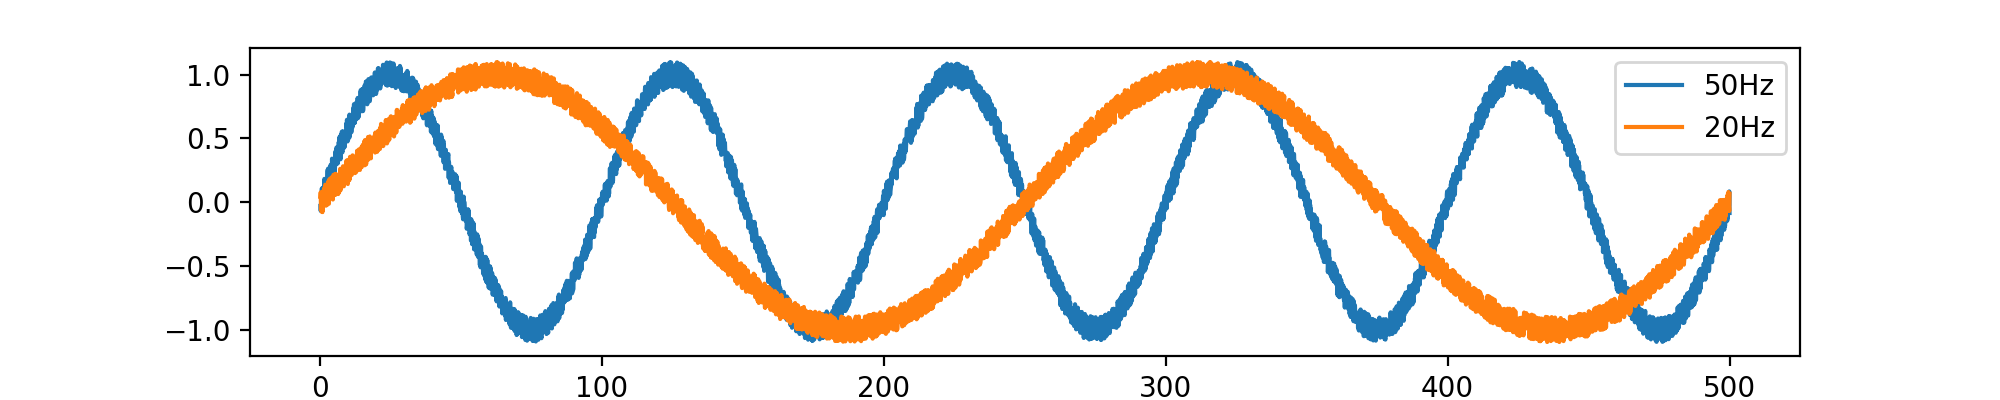

In [42]:
plt.figure(figsize=[10,2])
plt.plot(timestamps, data1, label='50Hz')
plt.plot(timestamps, data2, label='20Hz')

plt.legend()

<p>As we zoom in the random noise we added to the sinusoids becomes clear.</p>

<IPython.core.display.Javascript object>


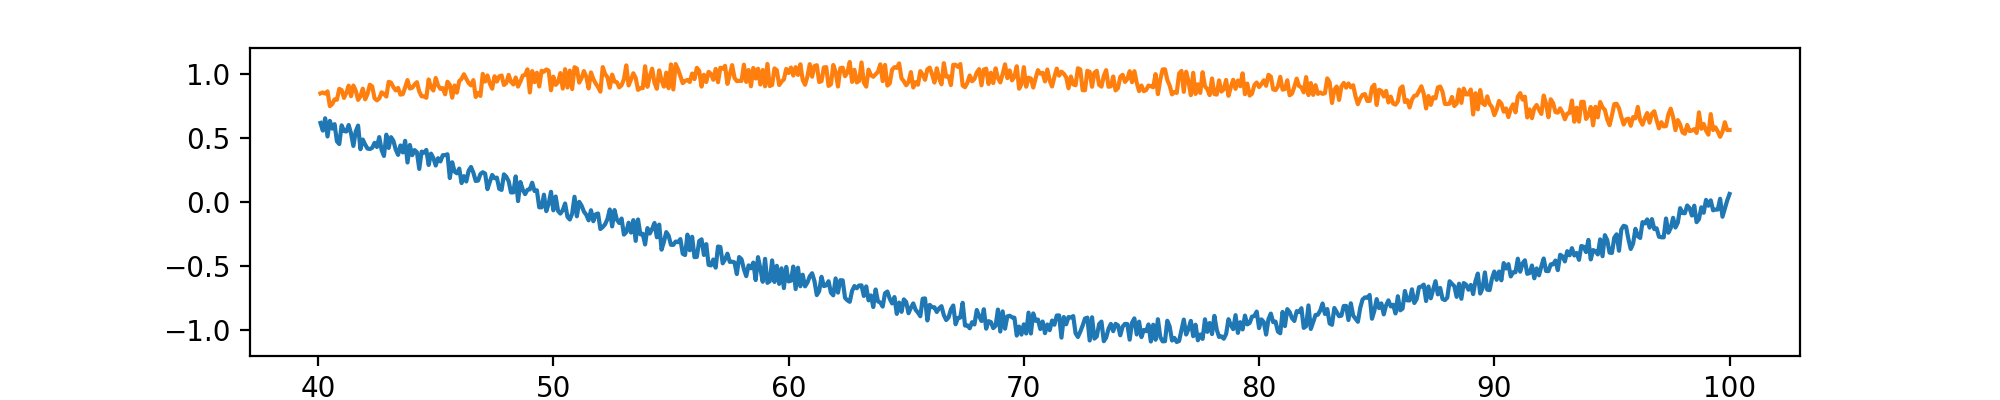

In [44]:
plt.figure(figsize=[10, 2])
plt.plot(timestamps[400:1000], data1[400:1000])
plt.plot(timestamps[400:1000], data2[400:1000])

## 2. Create a TimeSeries object

<p>The TimeSeries class is a convenient wrapper of xarray that offers functionalities for timeseries analysis. Although we focus our analysis here in the context of timeseries data, many of the following examples apply to non-timeseries, multidimentional datasets.  
To create a TimeSeries object, we just need to construct dimensions and the coordinates in those dimensions for a multidimentional array.</p>

In [54]:
# Let's stack the two time-series data arrays.
data = np.vstack((data1, data2))

# Constructing the timeseries object
ts = timeseries(data,
                dims=('data', 'time'),
                coords={'data':['data1', 'data2'],
                        'time':t,
                        'samplerate':sample_rate})
print ts

<xarray.TimeSeriesX (data: 2, time: 5000)>
array([[-0.029477, -0.069578, -0.025847, ..., -0.026903,  0.083457, -0.085974],
       [ 0.041733,  0.076936, -0.060761, ..., -0.038076, -0.070169,  0.064133]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


<p>timeseries also has a convenient plotting function.</p>

<IPython.core.display.Javascript object>


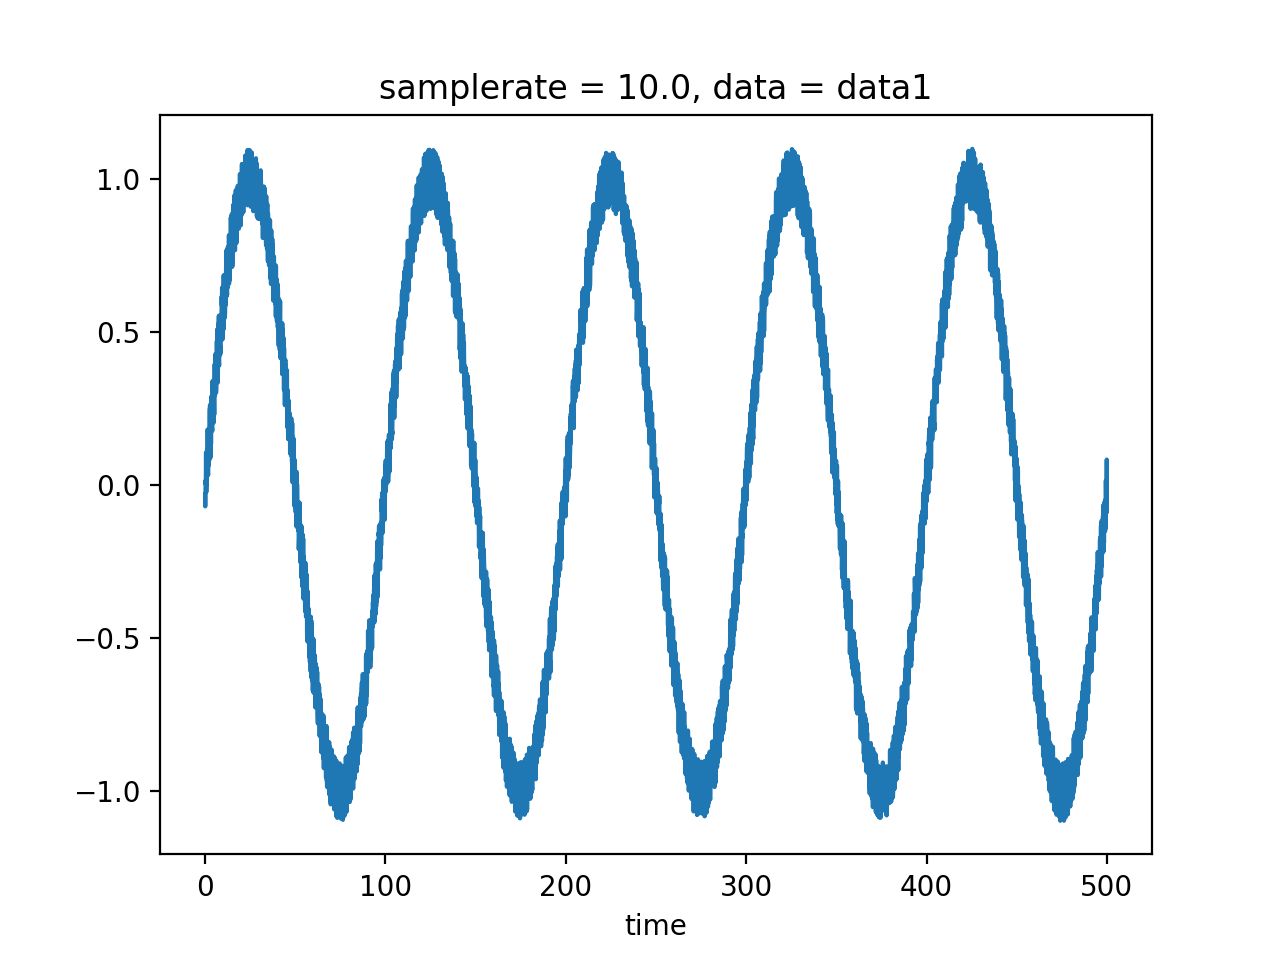

In [83]:
ts.sel(data='data1').plot()

## 3. Saving and loading your data
<p>timeseries objects can be easily saved and loaded in HDF5 format. </p>

In [8]:
# timeseries object can be easily saved
fname = 'my_ts_data.h5'
ts.to_hdf(fname)

In [9]:
ts = timeseries.from_hdf(fname)
print ts

<xarray.TimeSeriesX (data: 2, time: 5000)>
array([[-0.080334,  0.078434,  0.053347, ...,  0.039561,  0.085946, -0.027045],
       [ 1.06016 ,  0.986912,  0.994088, ...,  1.019155,  1.007782,  0.956887]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


## 4. Indexing your data

<p>We can used the .sel() function to select partial data by the coordinates, or give the dimension name instead of dimension index to numpy functions.</p>

In [76]:
# Select the data from 100s to 200s
ts.sel(time=(ts.time>100)&(ts.time<200))

<xarray.TimeSeriesX (data: 2, time: 1000)>
array([[ 0.013637,  0.080452, -0.020731, ...,  0.028735, -0.102384,  0.087831],
       [ 0.624659,  0.578264,  0.659824, ..., -0.965329, -1.020581, -0.882025]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 100.0 100.1 100.2 100.3 100.4 100.5 100.6 ...

In [78]:
# mean over the time dimension
ts.mean('time')

<xarray.TimeSeriesX (data: 2)>
array([ 0.0015  , -0.000841])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'

## 5. Matching coordinates

<p>We can also place the time dimension as the first dimension. The coordinates in TimeSeries is very useful and is used to keep track of the dimensions of the data. Therefore, the exact shape of the data or the order of the dimensions can vary.</p>

In [56]:
# Let's stack the two time-series data arrays.
data_transpose = np.vstack((data1, data2)).T

# Constructing the timeseries object
ts_transpose = timeseries(data_transpose,
                          dims=('time', 'data'),
                          coords={'time':t,
                                  'data':['data1', 'data2'],
                                  'samplerate':sample_rate})
print ts_transpose

<xarray.TimeSeriesX (time: 5000, data: 2)>
array([[-0.029477,  0.041733],
       [-0.069578,  0.076936],
       [-0.025847, -0.060761],
       ...,
       [-0.026903, -0.038076],
       [ 0.083457, -0.070169],
       [-0.085974,  0.064133]])
Coordinates:
    samplerate  float64 10.0
  * data        (data) |S5 'data1' 'data2'
  * time        (time) float64 0.0 0.1 0.2 0.3001 0.4001 0.5001 0.6001 ...


<p>Just to show that TimeSeries keeps track of the coordinates, we can try adding the original timeseries and its "transposed" version together. Because their coordinates match, operations can be performed between them even though the data underneath them are of different shapes.  
Note that because the transposed version of the data is just itself, by adding them together we're just doubling the values.</p>

<IPython.core.display.Javascript object>


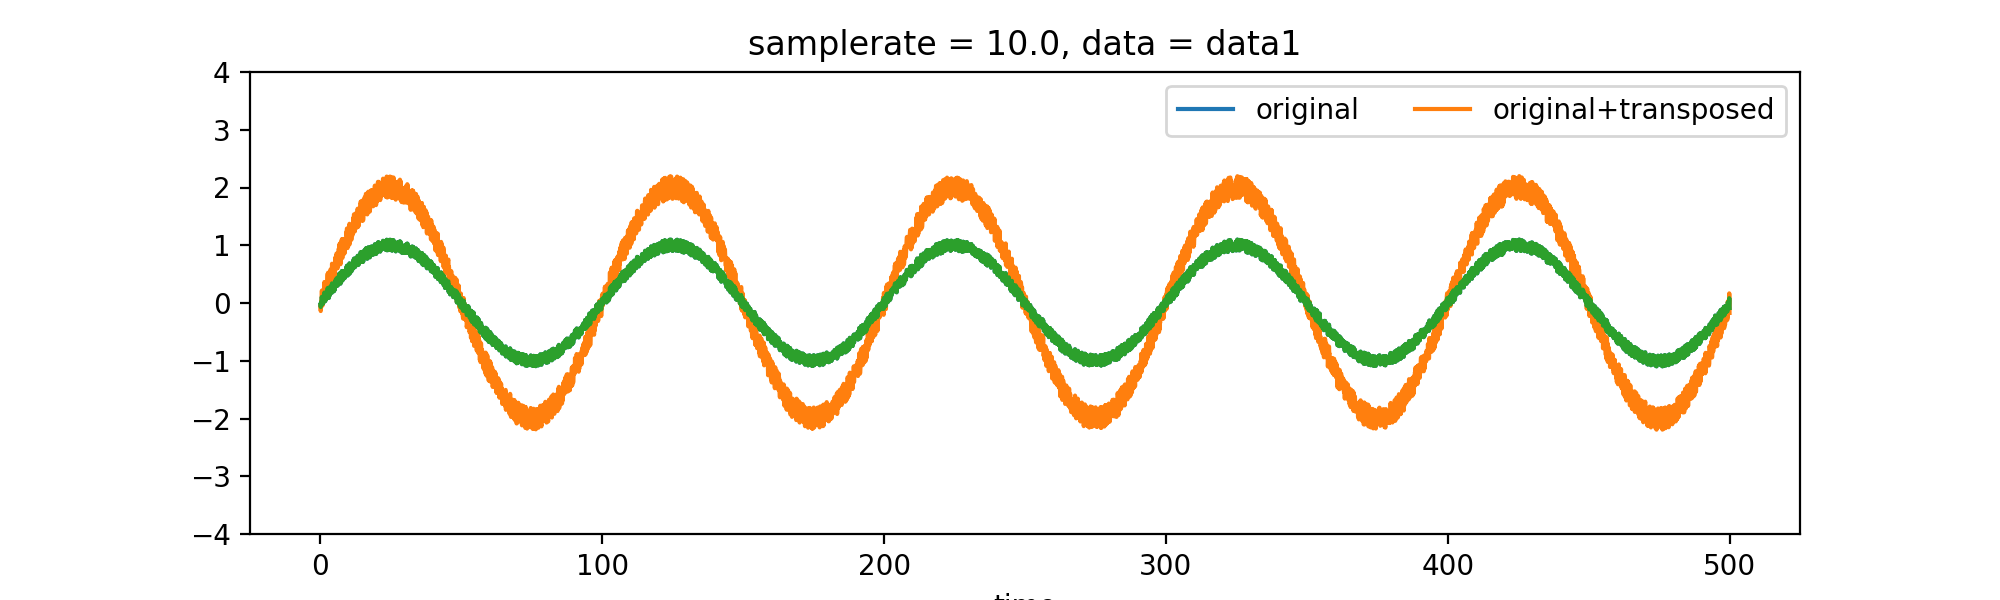

In [72]:
results = ts + ts_transpose

plt.figure(figsize=[10, 3])
plt.plot(ts.time, ts.sel(data='data1'), label='original')
plt.plot(results.time, results.sel(data='data1'), label='original+transposed')
plt.ylim([-4,4])
plt.legend(ncol=2)

<p>Without the coordinates, the data cannot be added because their shape wouldn't match.</p>

In [75]:
try:
    print (data+data_transpose)
except Exception as e:
    print 'Error: ' + str(e)

Error: operands could not be broadcast together with shapes (2,5000) (5000,2) 


## 6. Resampling your data
<p>We can resample the data to a specific samplerate.</p>

In [88]:
original = ts.sel(data='data1').sel(time=ts.time<30.0)
downsampled = original.resampled(resampled_rate=2.0)

<IPython.core.display.Javascript object>


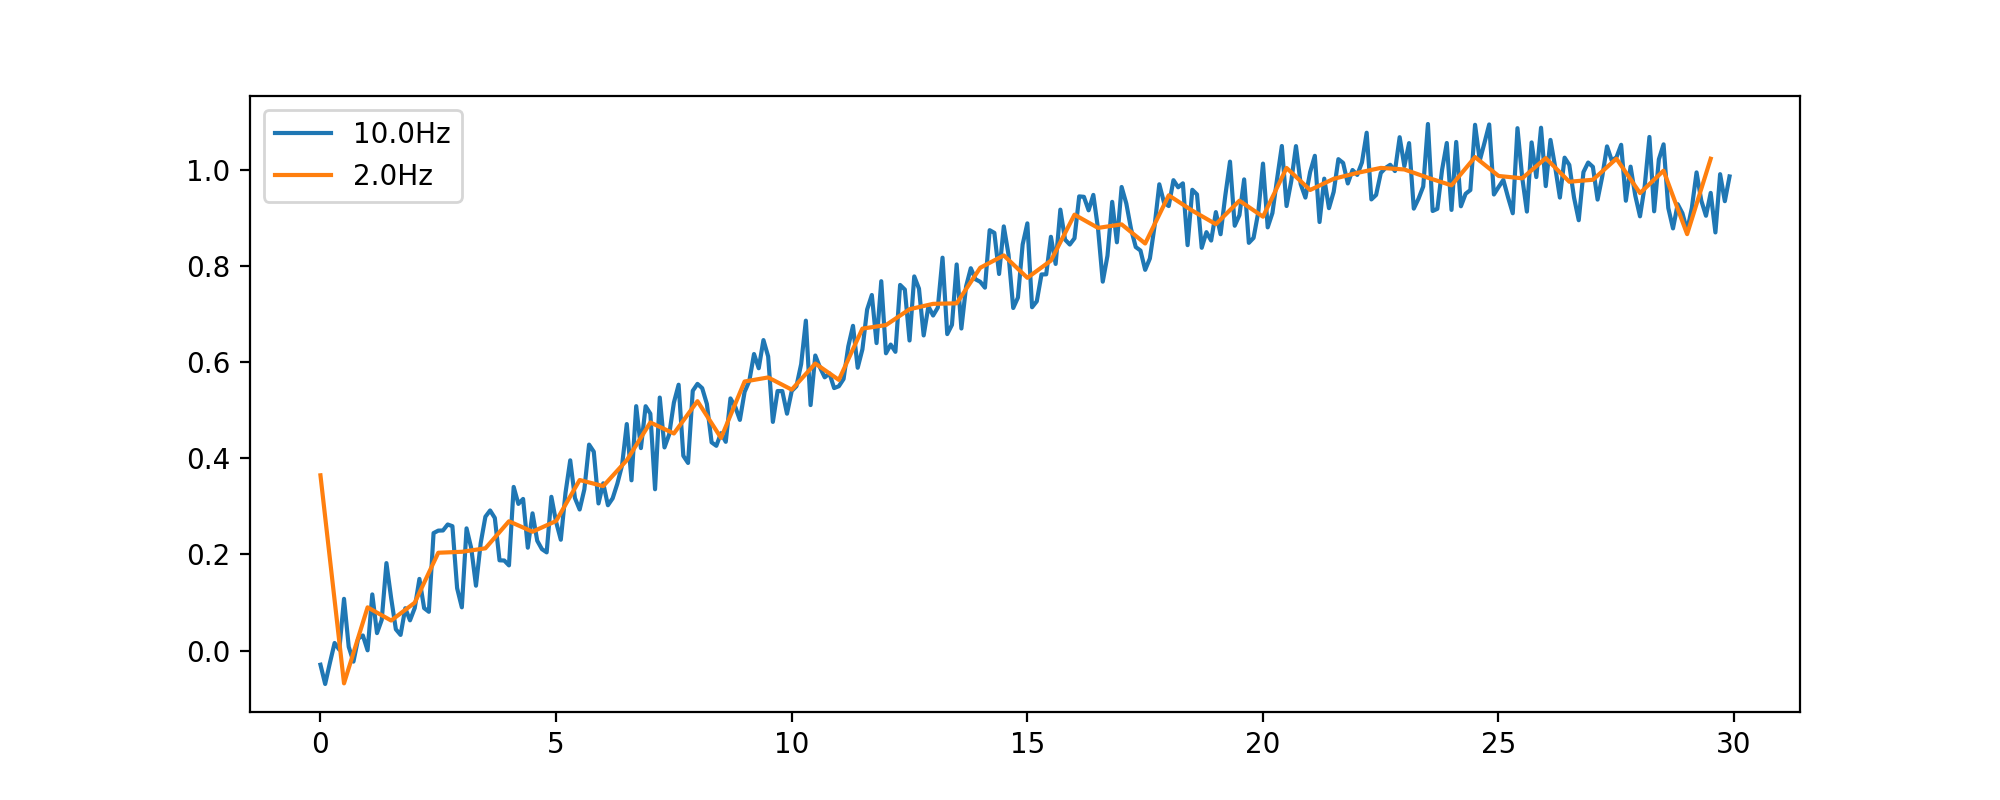

In [90]:
plt.figure(figsize=[10, 4])
plt.plot(original.time, original, label='10.0Hz')
plt.plot(downsampled.time, downsampled, label='2.0Hz')
plt.legend()

In [91]:
# timeseries update the samplerate for you
print original.samplerate
print downsampled.samplerate

<xarray.TimeSeriesX 'samplerate' ()>
array(10.)
Coordinates:
    samplerate  float64 10.0
    data        |S5 'data1'
<xarray.TimeSeriesX 'samplerate' ()>
array(2.)
Coordinates:
    samplerate  float64 2.0


## 7. Filtering your data
<p></p>

In [161]:
freq1 = 500
freq2 = 300
freq3 = 200

data1 = np.sin(2*np.pi*freq1*t)
data2 = np.sin(2*np.pi*freq2*t)
data3 = np.sin(2*np.pi*freq3*t)
data = data1 + data2 + data3

<IPython.core.display.Javascript object>


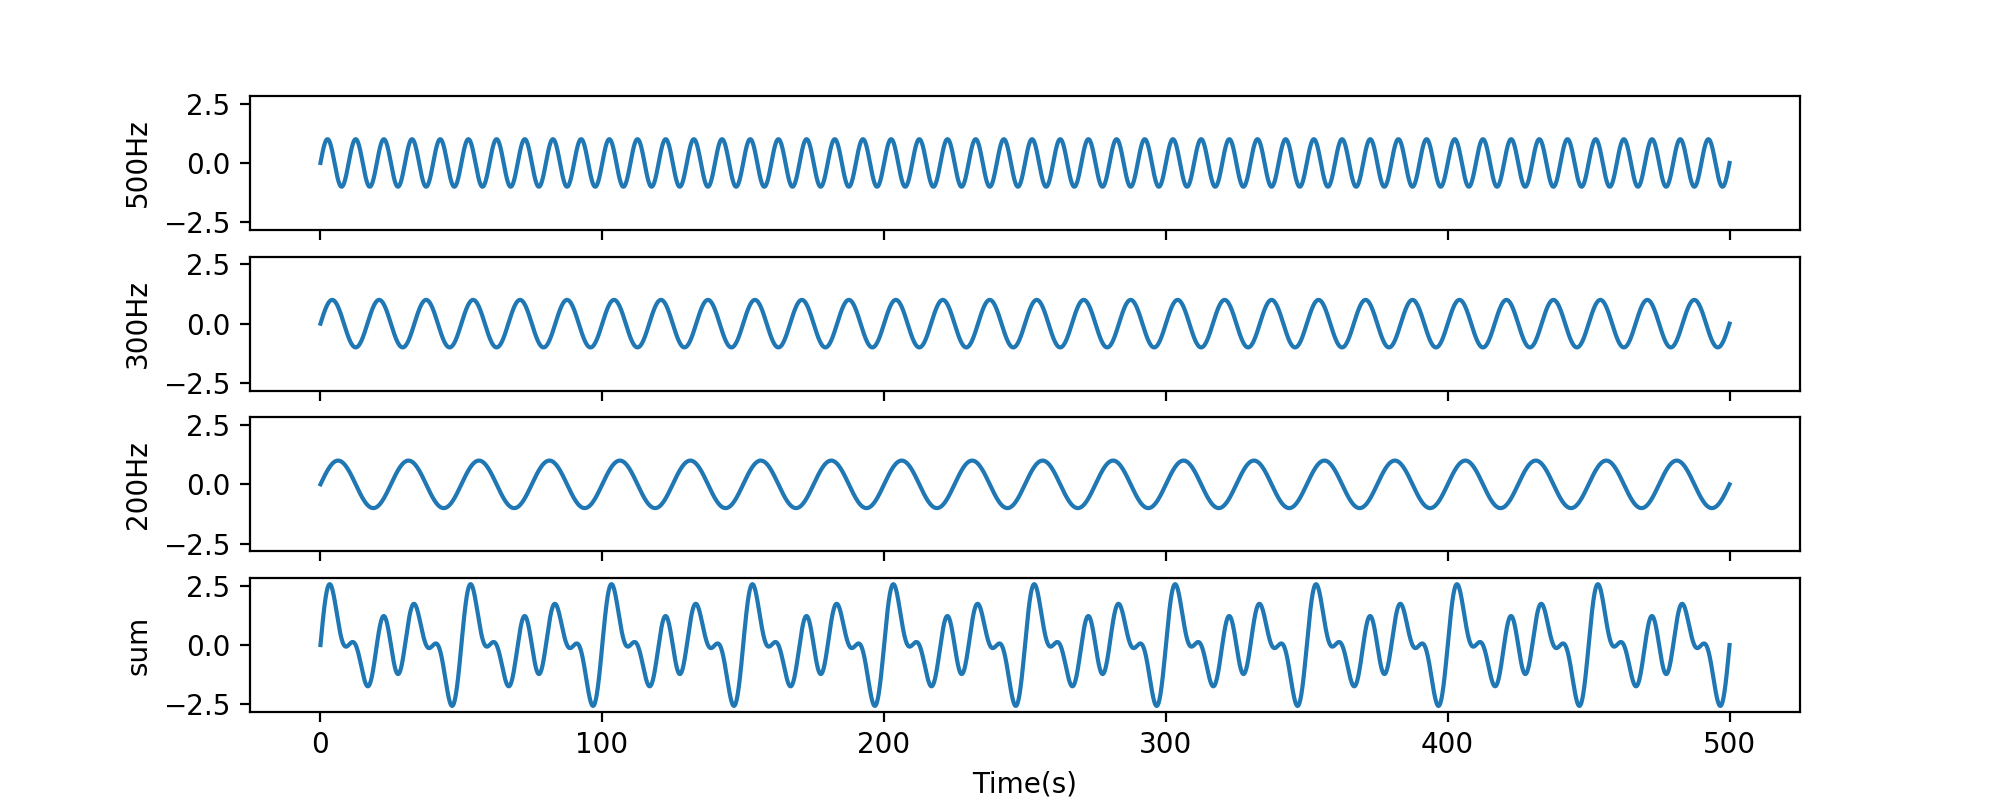

Text(0.5,0,u'Time(s)')

In [162]:
fig, ax = plt.subplots(4, figsize=[10, 4], sharex=True, sharey=True)
ax[0].plot(timestamps, data1)
ax[1].plot(timestamps, data2)
ax[2].plot(timestamps, data3)
ax[3].plot(timestamps, data)

ax[0].set_ylabel('500Hz')
ax[1].set_ylabel('300Hz')
ax[2].set_ylabel('200Hz')
ax[3].set_ylabel('sum')
ax[3].set_xlabel('Time(s)')

<p>
1. bandstop
2. lowpass
3. highpass
</p>

## 8. Power